In [64]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

## Introduction

Here we will use a PCA'd set of data that shows bank transactions. From the data, there is a classifier that shows whether a transaction was a case of fraud or not. Most of the features have been rendered anonymous other than time, amount and the classifier.

In [3]:
credit = pd.read_csv('creditcard.csv')

credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Explore the Data

In [84]:
# Not Fraud
compare = pd.DataFrame()

compare['Fraud'] = credit.Amount.loc[credit['Class']==1].describe()
compare['Not Fraud'] = credit.Amount.loc[credit['Class']==0].describe()

compare

,Fraud,Not Fraud
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


When viewing the shape of both the fraud and not fraud data, it is clear there is a massive class imbalance here. We will have to fix that to be able to predict accurately from it. 

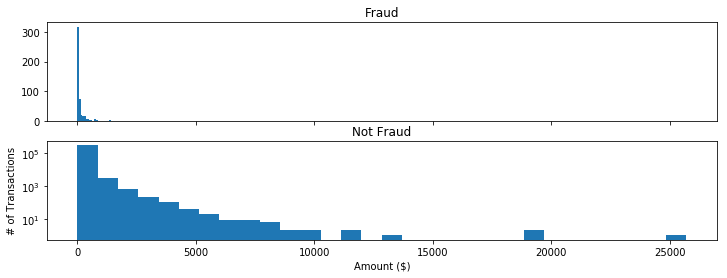

In [52]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(credit.Amount[credit.Class == 1], bins=30)
ax1.set_title('Fraud')
ax2.hist(credit.Amount[credit.Class == 0], bins=30)
ax2.set_title('Not Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('# of Transactions')
plt.yscale('log')
plt.show()

It also looks like most of our transactions come in at a relatively smaller amount. With the majority of the fraud transactions having being for a dollar amount of 0. Not what I would have expected, but there might be something more found in one of the PCA features that might be more able to explain the fraud

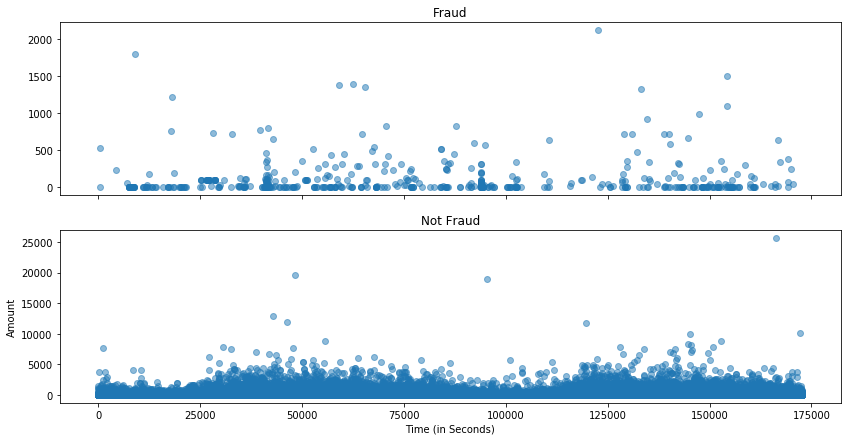

In [56]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14,7))
ax1.scatter(x="Time", y="Amount", data=credit.loc[credit['Class']==1], alpha=.5)
ax1.set_title('Fraud')
ax2.scatter(x="Time", y="Amount", data=credit.loc[credit['Class']==0], alpha=.5)
ax2.set_title('Not Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Time seems to be pretty evenly distributed across fraud and not fraud. Not too much to learn from either of these graphs

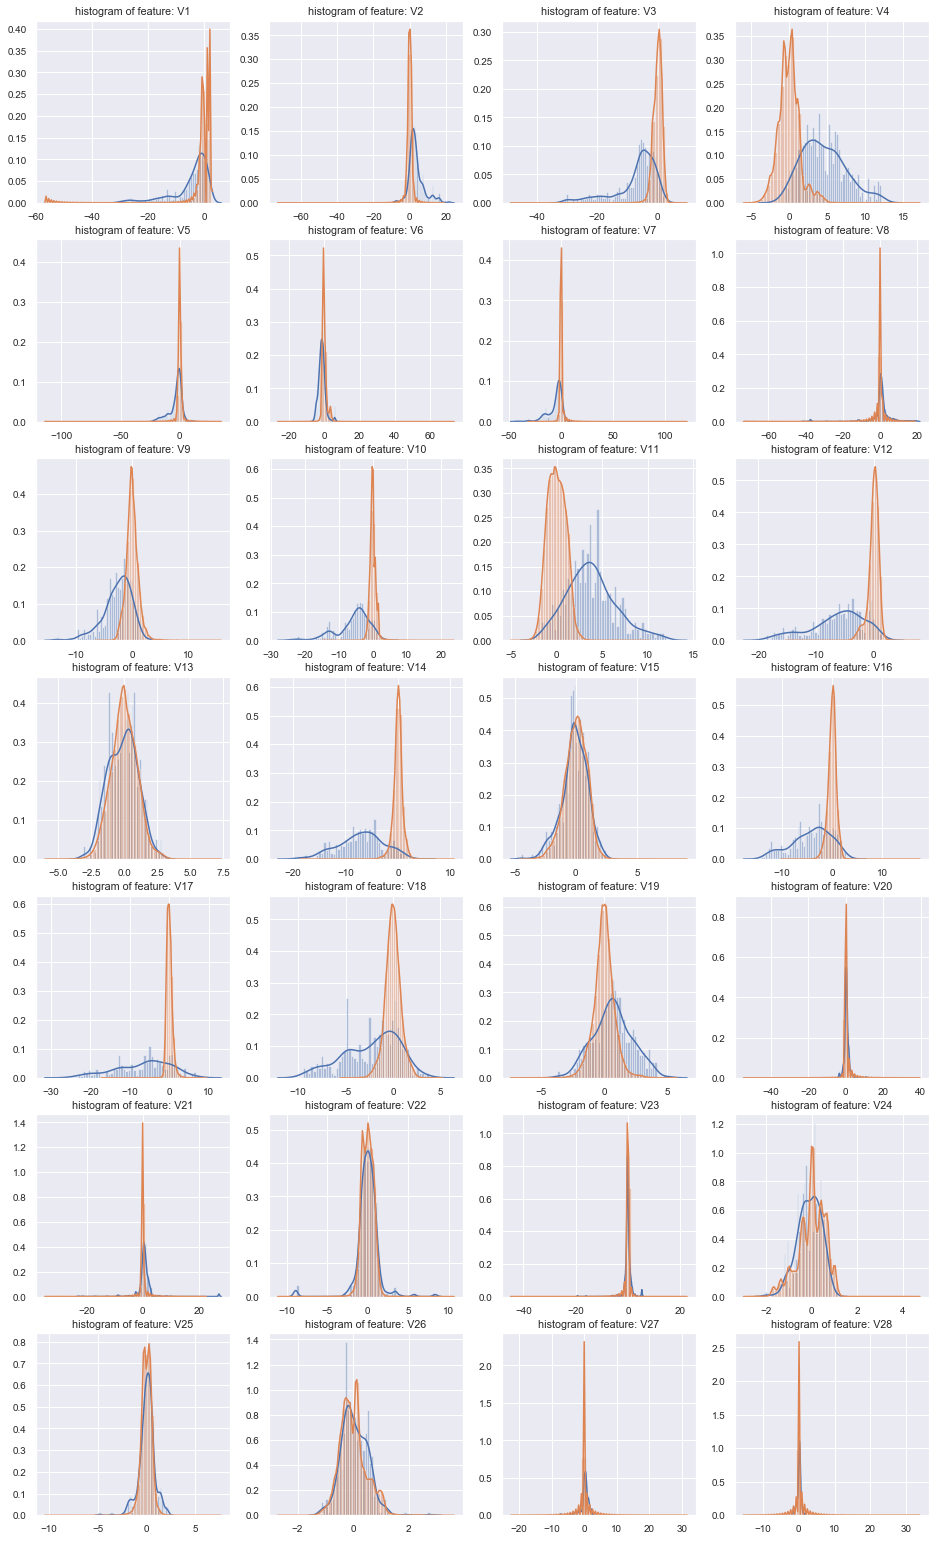

In [81]:
#Select only the anonymized features.
v_features = credit.iloc[:,1:29].columns

sns.set(font_scale=.9)
gs = gridspec.GridSpec(28, 4)
plt.figure(figsize=(16,28*4))
for i, cn in enumerate(credit[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit[cn][credit.Class == 1], bins=50)
    sns.distplot(credit[cn][credit.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

When viewing the histograms of each of the features and comparing the fraud and not fraud variable, it becomes clear that a few features are going to be much more valuable than others when it comes to predicting. Certain distributions are nearly the same, whereas in features like V17 and V18 the variation in distribution will allow us to distinguish the variable a bit more.

### Let's Get Rid of the Class Imbalance

As we prepare to model, we should level out the class playing field

In [93]:
# Make the fraud vs not fraud be evenly distributed

credit_s = credit.sample(frac=1)

fraud = credit_s.loc[credit['Class']==1]
not_fraud = credit_s.loc[credit['Class']==0][:492]

credit_dist = pd.concat([fraud, not_fraud])

credit_dist = credit_dist.sample(frac=1, random_state=40)

compare = pd.DataFrame()

compare['Fraud'] = credit_dist.Amount.loc[credit_dist['Class']==1].describe()
compare['Not Fraud'] = credit_dist.Amount.loc[credit_dist['Class']==0].describe()

compare

,Fraud,Not Fraud
count,492.000000,492.000000
mean,122.211321,87.822947
std,256.683288,250.456027
min,0.000000,0.000000
25%,1.000000,5.760000
50%,9.250000,20.800000
75%,105.890000,70.362500
max,2125.870000,3669.000000


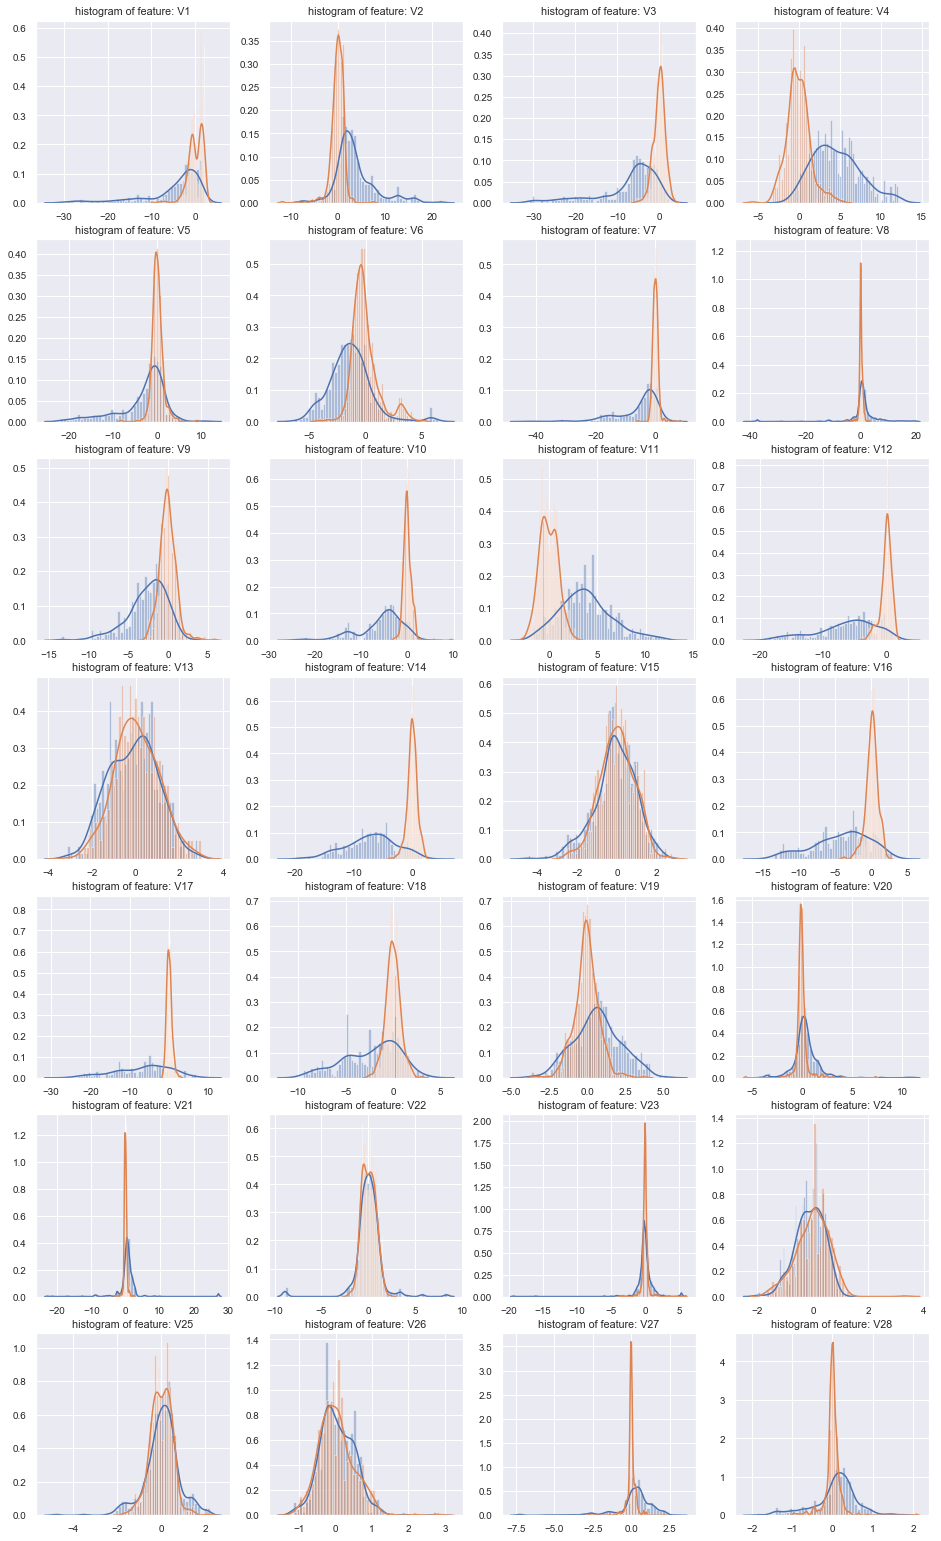

In [94]:
#Select only the anonymized features.
v_features = credit_dist.iloc[:,1:29].columns

sns.set(font_scale=.9)
gs = gridspec.GridSpec(28, 4)
plt.figure(figsize=(16,28*4))
for i, cn in enumerate(credit_dist[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(credit_dist[cn][credit_dist.Class == 1], bins=50)
    sns.distplot(credit_dist[cn][credit_dist.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

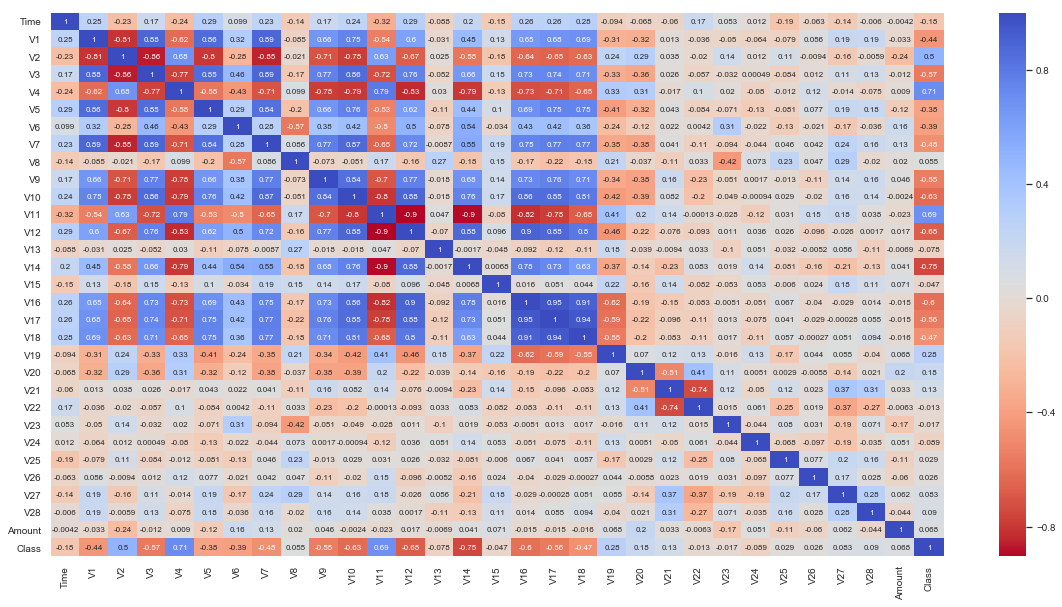

In [108]:
plt.figure(figsize=(20,10))
sample_corr = credit_dist.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8})
ax2.set_title('Correlation Matrix', fontsize=14)
plt.show()

When we balance out the classes, it adds even more variation into our histograms. Also, taking a look at the correlation map, we begin to see what we saw in the graphs reflected. While there are very few positively correlated features, there are a fair amount that have a strong negative correlation.

• *Significant Positive Correlation to Class:* V2, V4, V11, & kind of V19, V20 & V21

• *Significant Negative Correlation to Class:* V1, V3, V5, V6, V7, V9, V10, V12, V14, V16, V17, & V18

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

X = credit_dist.drop(['Class'], 1)
y = credit_dist['Class']

selector=SelectKBest(score_func=f_classif,k=30)
selector.fit(X,y)
scores = pd.DataFrame()
scores["Attribute"] = X.columns
scores["F Score"] = selector.scores_
scores["P Value"] = selector.pvalues_
scores["Support"] = selector.get_support()

scores = scores.sort_values(by=['F Score'], ascending=False)

key_vals = scores.Attribute.head(20).values

scores

,Attribute,F Score,P Value,Support
14,V14,1262.460678,1.824426e-178,True
4,V4,1020.586074,3.955362e-154,True
11,V11,899.298651,8.581400e-141,True
12,V12,842.967364,2.651359e-134,True
10,V10,638.594047,6.081509e-109,True
16,V16,557.039497,6.498105e-98,True
3,V3,462.861548,2.014141e-84,True
17,V17,442.979817,1.841516e-81,True
9,V9,425.774980,7.267027e-79,True
2,V2,325.056256,5.405891e-63,True


### Modeling

As we move into beginnging to model, we will run the dataset through these models: Logistic Regression, K Nearest Neighbors, Support Vector, & Random Forest.

In [112]:
X = credit_dist.drop(['Class'], 1)
y = credit_dist['Class']

In [113]:
# to split a training and test sample
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9, max_iter = 150)
lr.fit(x_train, y_train)

# Set Up Predictor
ypred_lr = lr.predict(x_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

# Set Up Predictor
ypred_knn = knn.predict(x_test)

In [119]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)
ypred_svc = svc.predict(x_test)

In [120]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

ypred_rfc = rfc.predict(x_test)

In [135]:
from sklearn.metrics import classification_report
print('Logistic Regression:\n')
print(classification_report(y_test, ypred_lr))

print('\nK Nearest Neighbors:\n')
print(classification_report(y_test, ypred_knn))

print('\nSupport Vector Machines:\n')
print(classification_report(y_test, ypred_svc))

print('\nRandom Forest:\n')
print(classification_report(y_test, ypred_rfc))

Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       136
           1       0.98      0.90      0.94       110

   micro avg       0.95      0.95      0.95       246
   macro avg       0.95      0.94      0.95       246
weighted avg       0.95      0.95      0.95       246


K Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       136
           1       0.61      0.71      0.66       110

   micro avg       0.67      0.67      0.67       246
   macro avg       0.67      0.67      0.67       246
weighted avg       0.68      0.67      0.67       246


Support Vector Machines:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       136
           1       1.00      0.81      0.89       110

   micro avg       0.91      0.91      0.91       246
   macro avg       0.93      0.90      0.91       246
we

Comparing the classification reports of all of the models shows that Random Forest and Logistic Regression perform the best of the bunch. KNN performs quite poorly and SVM does fairly well but not quite up to the par set by Random Forest and the Logistic Regression.

In [141]:
# Grid Search CV for decision tree
from sklearn.model_selection import GridSearchCV

#GridSearchCV for random forest 
param_grid = {'n_estimators':[10,25,50,75,100,125,150,175,200,300,400,500]}

# Start the grid search again
grid_DT = GridSearchCV(rfc, param_grid, cv=10, verbose=3)

grid_DT.fit(x_train, y_train)

# summarize the results of the grid search
# View the accuracy score
print('Best score for data:', grid_DT.best_score_) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] n_estimators=10 .................................................
[CV] ...................... n_estimators=10, score=0.92, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.9066666666666666, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ......... n_estimators=10, score=0.972972972972973, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.9594594594594594, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.9594594594594594, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.9324324324324325, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ n_estimators=10, score=0.8767123287671232, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.9315068493150684, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.9466666666666667, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.9066666666666666, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.9594594594594594, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.9594594594594594, total=   0.1s
[CV] n_estimators=25 .................................................
[CV] ......... n_estimators=25, score=0.972972972972973, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] .

[CV] ....... n_estimators=150, score=0.9041095890410958, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] ....... n_estimators=150, score=0.9452054794520548, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] ........ n_estimators=150, score=0.863013698630137, total=   0.3s
[CV] n_estimators=150 ................................................
[CV] ....... n_estimators=150, score=0.9315068493150684, total=   0.3s
[CV] n_estimators=175 ................................................
[CV] ....... n_estimators=175, score=0.9466666666666667, total=   0.3s
[CV] n_estimators=175 ................................................
[CV] ..................... n_estimators=175, score=0.92, total=   0.3s
[CV] n_estimators=175 ................................................
[CV] ....... n_estimators=175, score=0.9864864864864865, total=   0.3s
[CV] n_estimators=175 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   37.3s finished


In [148]:
rfc = ensemble.RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)

ypred_rfc = rfc.predict(x_test)

In [149]:
print('\nRandom Forest:\n')
print(classification_report(y_test, ypred_rfc))


Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       136
           1       0.99      0.91      0.95       110

   micro avg       0.96      0.96      0.96       246
   macro avg       0.96      0.95      0.95       246
weighted avg       0.96      0.96      0.96       246



In [150]:
# With the full Dataset
x_full = credit.drop(['Class'], 1)
y_full = credit['Class']

print('Logistic Regression:\n')
print(classification_report(y_full, lr.predict(x_full)))

print('Random Forest:\n')
print(classification_report(y_full, rfc.predict(x_full)))

Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.04      0.92      0.08       492

   micro avg       0.96      0.96      0.96    284807
   macro avg       0.52      0.94      0.53    284807
weighted avg       1.00      0.96      0.98    284807

Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.07      0.98      0.13       492

   micro avg       0.98      0.98      0.98    284807
   macro avg       0.54      0.98      0.56    284807
weighted avg       1.00      0.98      0.99    284807



### Conclusion

Ultimately the Random Forest was the highest performer of any of the models. On the training and test set it performed fairly well but understandably it faltered when put against the full dataset. The recall of 98% is very impressive but the precision being so low is worrying. In the end, it is the model I would go with but could also use a bit more tuning to be sure it performs well even when there aren't that many cases of fraud.